 # <span style='color:brown'> Bike Sharing Assignement | Multiple Linear Regression </span>:
Problem Statement:

* <span style='color:red'> Description of the industry </span>: A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


* <span style='color:red'>Business Problem:</span>: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


* <span style='color:red'>What do we need to find?:</span>: They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:


* Which variables are significant in predicting the demand for shared bikes.
  How well those variables describe the bike demands


# <span style='color:brown'>Reading and Understanding the Data
    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data into the python notebook
bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the cells and columns of the data set
bike.shape

(730, 16)

In [4]:
# Check the null value and their data structures
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking numerical variables in dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <span style='color:orange'> Observation:
* There are 730 rows and 16 columns.
    
* There is no null values to take action.
    
* Data Types of the data are not in correct formal.
* "isntant" and 'dteday' which is not serving any purpose.Dteday already has it's information extracted and thus we would not need that columns. There are no missing values in the data

In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Checking unique values
cat=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
for i in cat:
    print(i,":",bike[i].unique())

season : [1 2 3 4]
yr : [0 1]
mnth : [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday : [0 1]
weekday : [1 2 3 4 5 6 0]
workingday : [1 0]
weathersit : [2 1 3]


In [8]:
# Replace season binary numbers into meaningful categories.
bike["season"]=bike["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [9]:
# Replace month binary numbers into meaningful categories.
bike["mnth"]=bike["mnth"].map({1:"January", 2:"February", 3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [10]:
# Replace weekday binary numbers into meaningful categories.
bike["weekday"]=bike["weekday"].map({0:'sunday', 1:'monday', 2:'tuesday',3:'wednesday', 4:'thursday', 5:'friday', 6:'satday'})

In [11]:
# Replace weathersit binary numbers into meaningful categories.
bike["weathersit"]=bike["weathersit"].map({1:"clear", 2:"mist", 3:"snow", 4:"rainy"})

In [12]:
# checking for update
for i in cat:
    print(i,":",bike[i].unique())
    print(bike[i].value_counts())
    print( "        " )

season : ['spring' 'summer' 'fall' 'winter']
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
        
yr : [0 1]
0    365
1    365
Name: yr, dtype: int64
        
mnth : ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
December     62
March        62
October      62
August       62
January      62
May          62
July         62
September    60
June         60
April        60
November     60
February     56
Name: mnth, dtype: int64
        
holiday : [0 1]
0    709
1     21
Name: holiday, dtype: int64
        
weekday : ['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'satday' 'sunday']
monday       105
tuesday      105
satday       104
thursday     104
friday       104
wednesday    104
sunday       104
Name: weekday, dtype: int64
        
workingday : [1 0]
1    504
0    226
Name: workingday, dtype: int64
        
weathersit : ['mist' 'clear' 'snow']
clear    463
mist     246
snow    

# <span style='color:brown'> Visualizing the data (Exploratory Data Analysis)

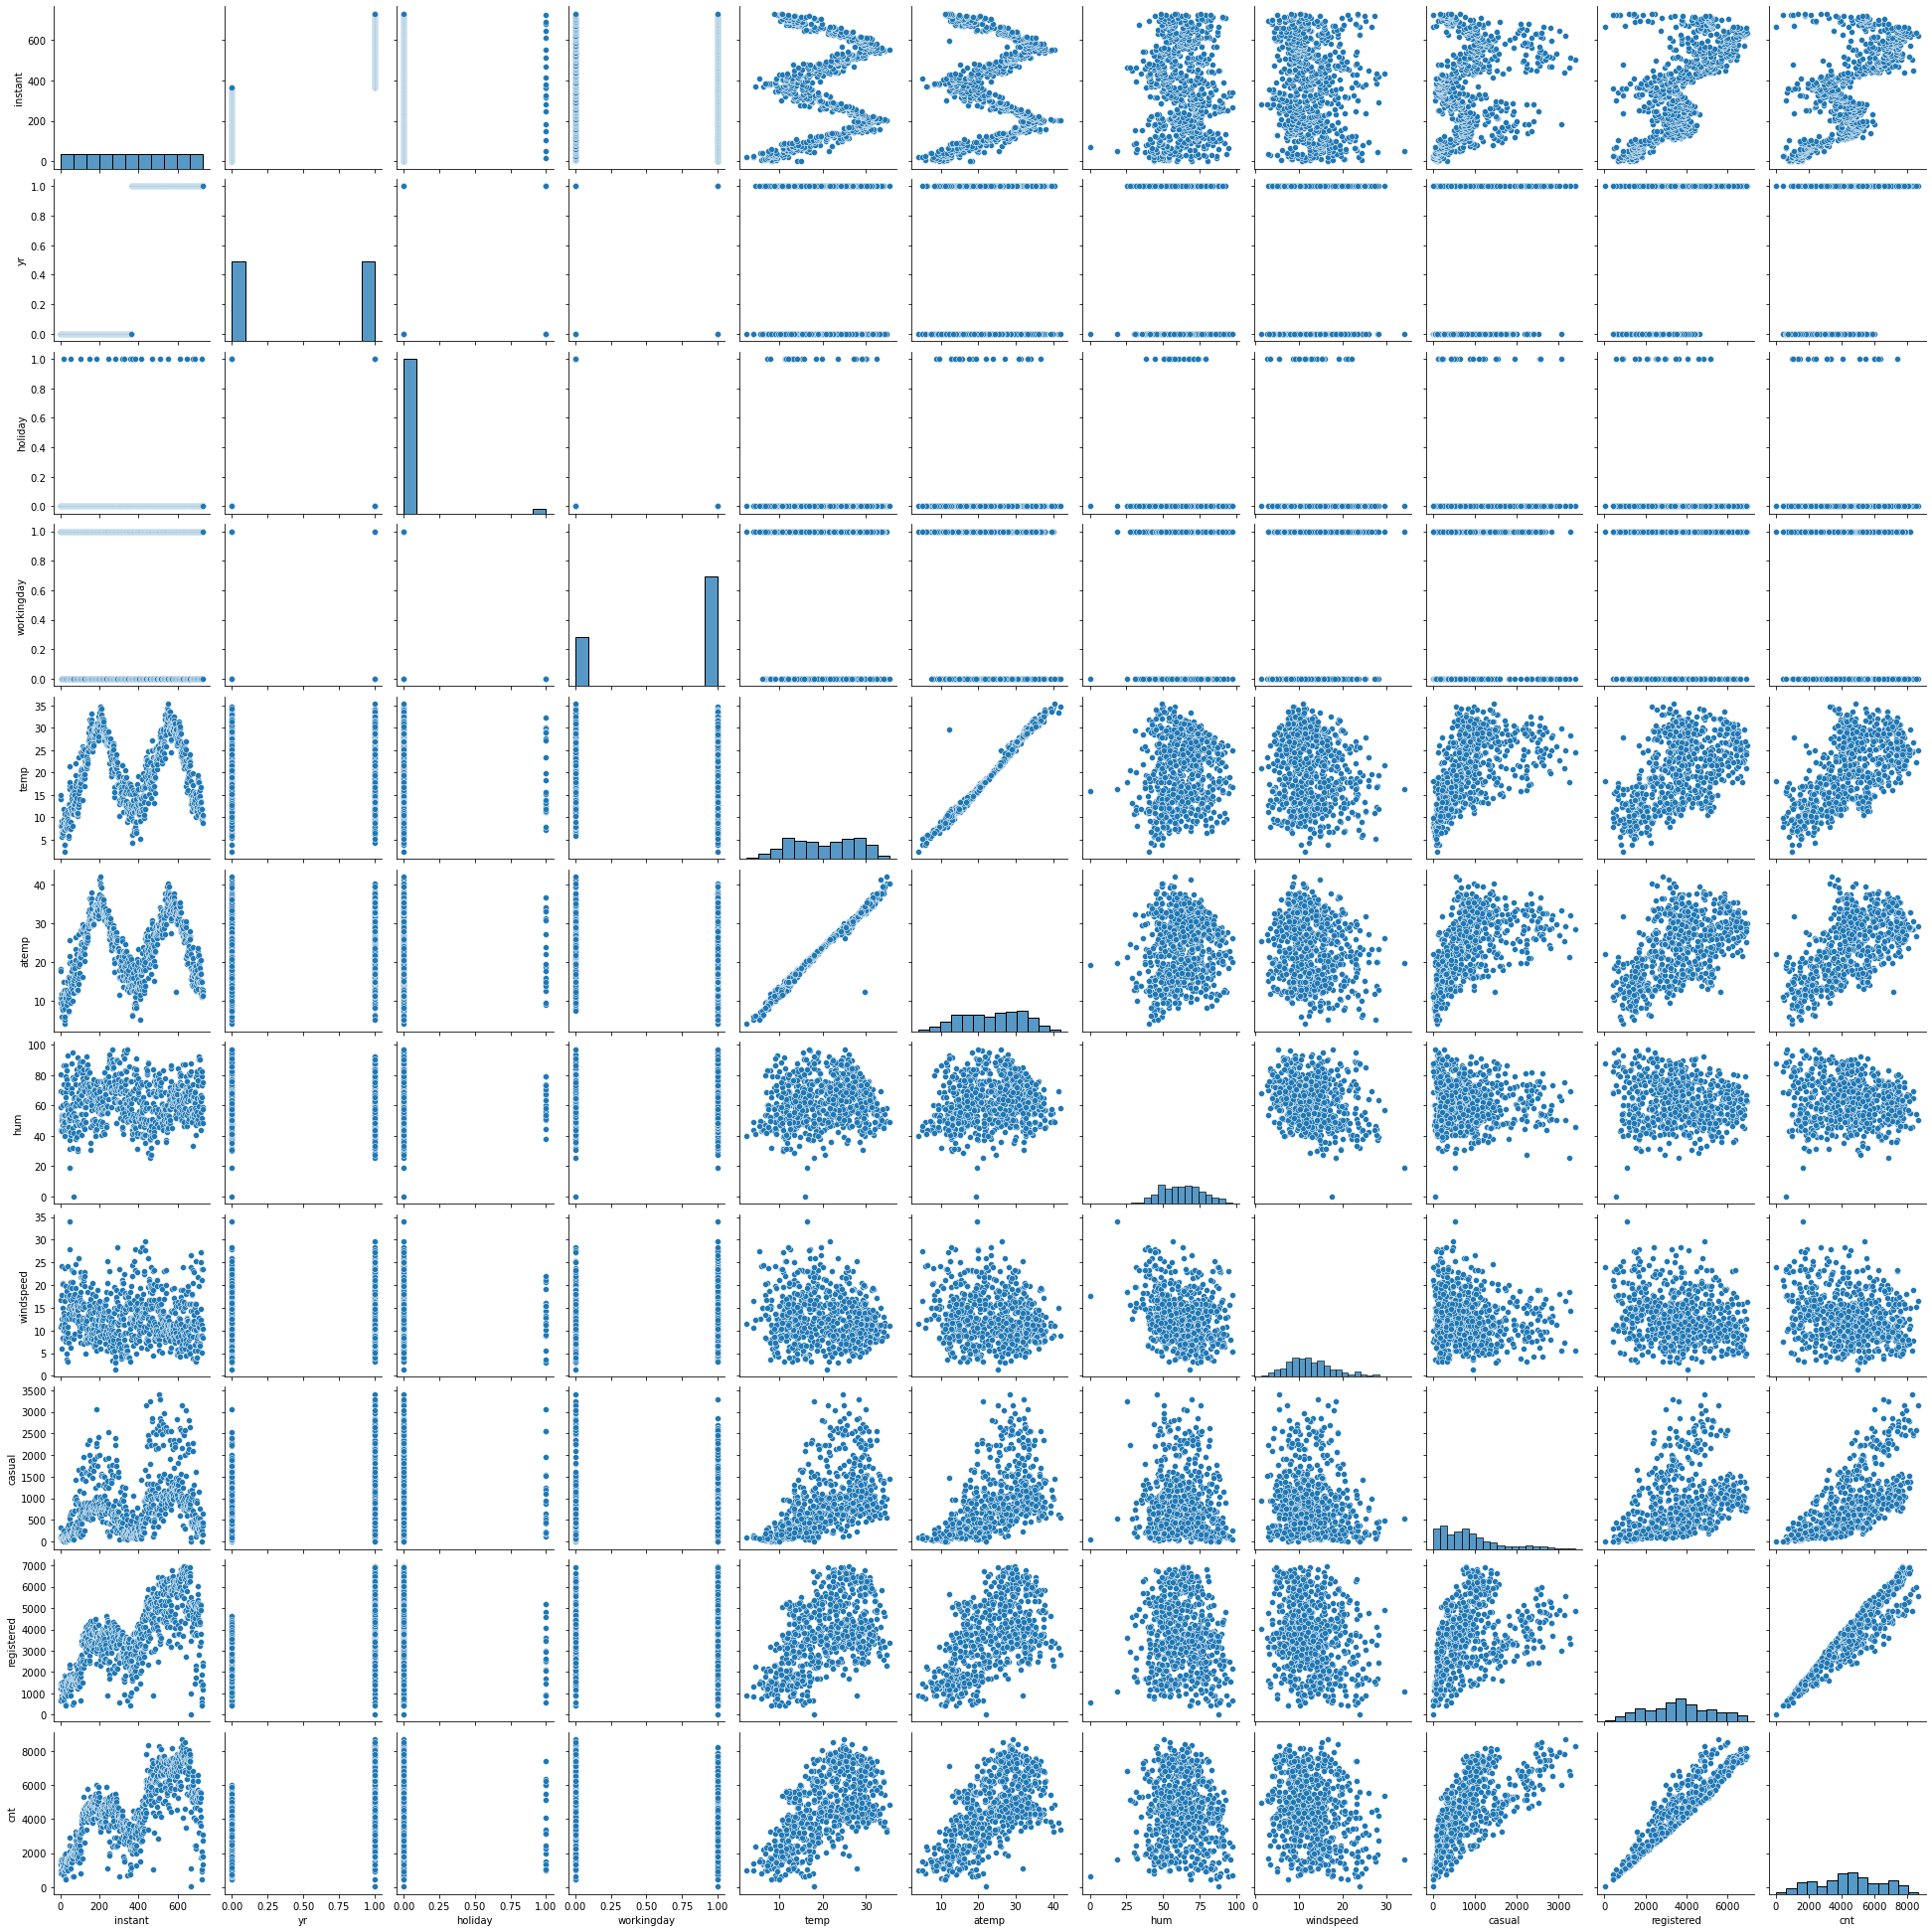

In [13]:
# Plotting scatter plot for numerical variables
sns.pairplot( bike)
plt.show()

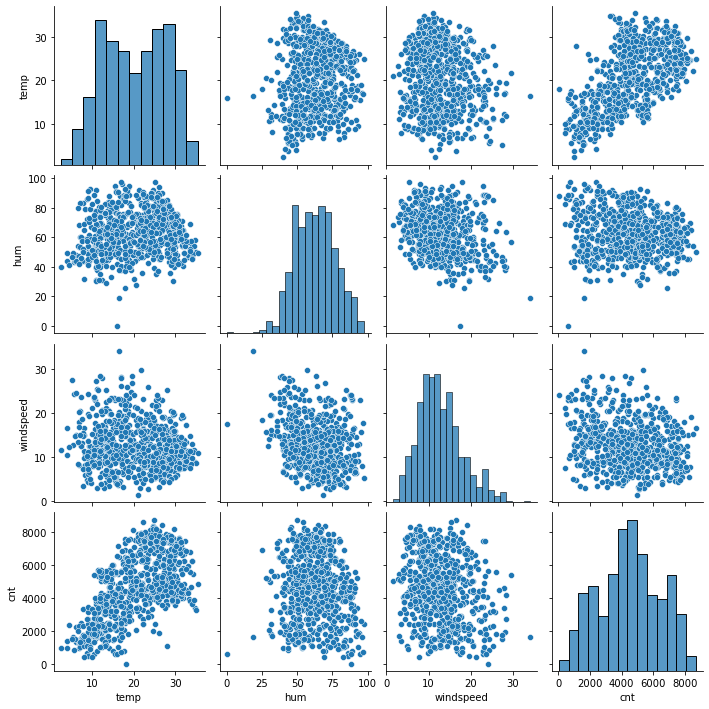

In [14]:
# Plotting pairplot for numerical variables 
sns.pairplot(bike,x_vars=["temp","hum",'windspeed','cnt'],y_vars=["temp","hum",'windspeed','cnt'])
plt.show()

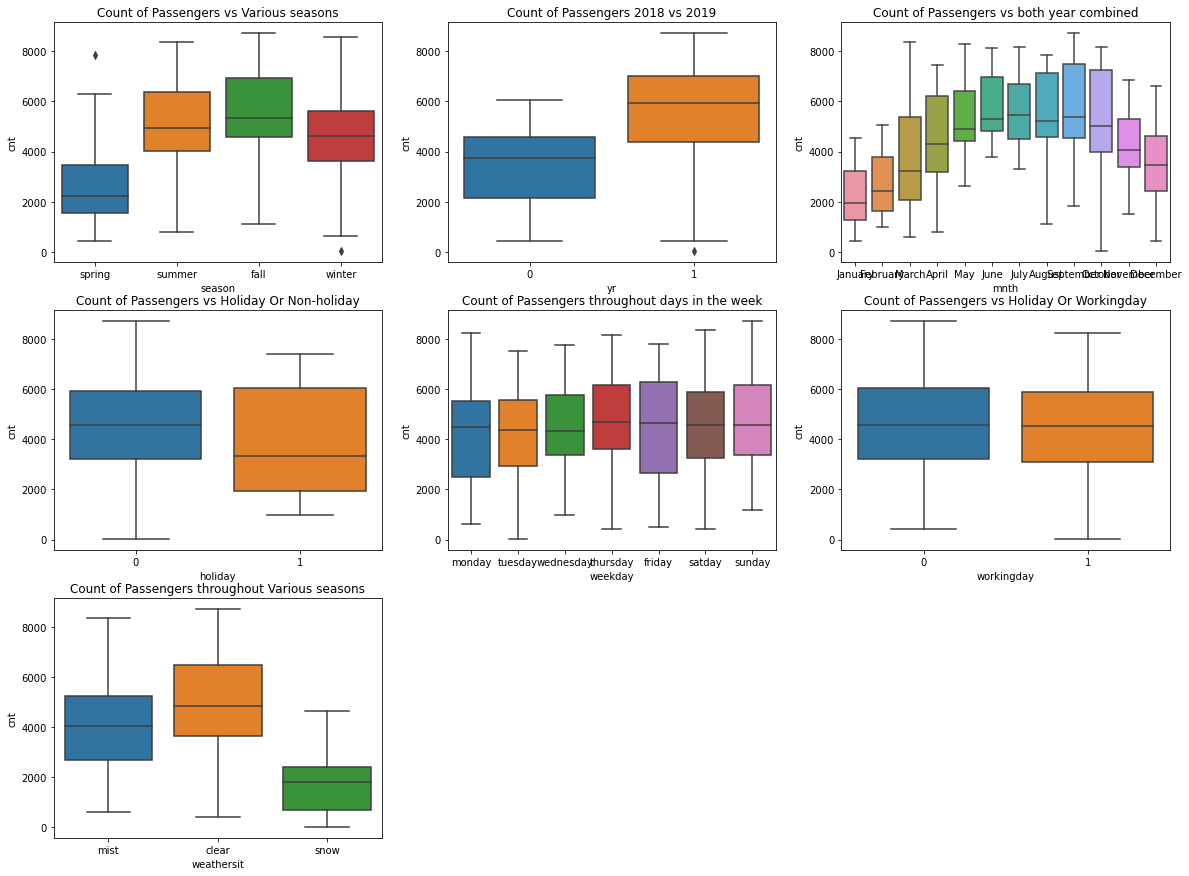

In [15]:
# Plotting box plot for categorical variables against 'cnt'
plt.figure(figsize=(20,15)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike).set_title('Count of Passengers vs Various seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike).set_title('Count of Passengers 2018 vs 2019')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike).set_title('Count of Passengers vs both year combined')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike).set_title('Count of Passengers vs Holiday Or Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike).set_title('Count of Passengers throughout days in the week')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike).set_title('Count of Passengers vs Holiday Or Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike).set_title('Count of Passengers throughout Various seasons')

plt.show()

### <span style='color:orange'> observation:

* The count of bike sharing is less in spring when compare to other seasons.
* The number of bike shares incresed in 2019
* septmber and october has high count of persons opted for bike.
* during clean weathersit the count of passengers have been increased.

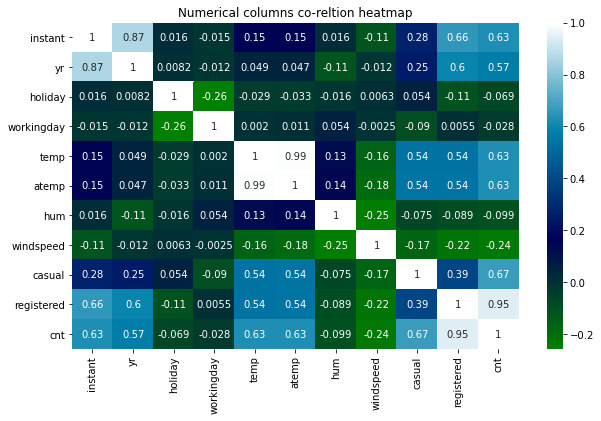

In [16]:
# Heatmap against each other to see ther co-relations
plt.figure(figsize=(10,6))
sns.heatmap(bike.corr(),annot=True,cmap="ocean")
plt.title("Numerical columns co-reltion heatmap")
plt.show()

# <span style='color:brown'> Data Preparation

In [17]:
# Drop columns which does not serve any purpose
bike.drop(['instant'],axis=1,inplace=True)
bike.drop(['dteday'],axis=1,inplace=True)
bike.drop(['atemp'],axis=1,inplace=True)
bike.drop(['casual'],axis=1,inplace=True)
bike.drop(['registered'],axis=1,inplace=True)

In [18]:
# Convert the categorical data into dummy variables
# Create a new dataframe to store them
status=pd.get_dummies(bike[['season','mnth','weekday','weathersit']],drop_first=True)
status.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_monday,weekday_satday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_mist,weathersit_snow
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# We then join orignal data and the dummy variable dataframe 'status'.
final=pd.concat([bike,status],axis=1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_October,mnth_September,weekday_monday,weekday_satday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_mist,weathersit_snow
0,spring,0,January,0,monday,1,mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,January,0,tuesday,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,January,0,wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# We then drop the indivisual columns whose dummy variables have been created.
final=final.drop(['season','mnth','weekday','weathersit'],axis=1)
final.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_monday,weekday_satday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_mist,weathersit_snow
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## <span style='color:BROWN'> Splitting the data into test and train datasets

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(final, train_size = 0.7, test_size = 0.3, random_state =200)

In [22]:
# Checking the shape of train dataset
df_train.shape

(510, 29)

In [23]:
# Checking the shape of train dataset
df_test.shape

(219, 29)

### <span style='color:green'> Rescalling the Feaatures

In [24]:
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns
# creating numaric vars

scaler_vars =['temp','hum','windspeed','cnt']

# FIt on data

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

In [26]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_monday,weekday_satday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_mist,weathersit_snow
728,1,0,1,0.252441,0.498067,0.676936,0.164795,1,0,0,...,0,0,1,0,0,0,0,0,0,0
56,0,0,1,0.286664,0.554315,0.338464,0.185682,1,0,0,...,0,0,1,0,0,0,0,0,0,0
13,0,0,0,0.130569,0.554222,0.214724,0.119522,1,0,0,...,0,0,0,0,1,0,0,0,0,0
120,0,0,1,0.503767,0.785315,0.173093,0.352529,0,1,0,...,0,0,0,0,0,0,1,0,1,0
252,0,0,1,0.771134,0.776728,0.270509,0.593263,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [27]:
# Checking minimum and maximum values of the normalized variables

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_monday,weekday_satday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_mist,weathersit_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.033333,0.698039,0.555129,0.649374,0.350547,0.489265,0.252941,0.260784,0.247059,...,0.084314,0.070588,0.152941,0.127451,0.147059,0.145098,0.131373,0.156863,0.337255,0.021569
std,0.500352,0.179682,0.459559,0.232861,0.146392,0.162339,0.233589,0.435124,0.439494,0.431725,...,0.278131,0.256387,0.360284,0.333805,0.354512,0.352545,0.338139,0.364028,0.473237,0.145413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353506,0.542353,0.234958,0.325456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560983,0.647488,0.330767,0.494265,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.763381,0.756118,0.438134,0.655952,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


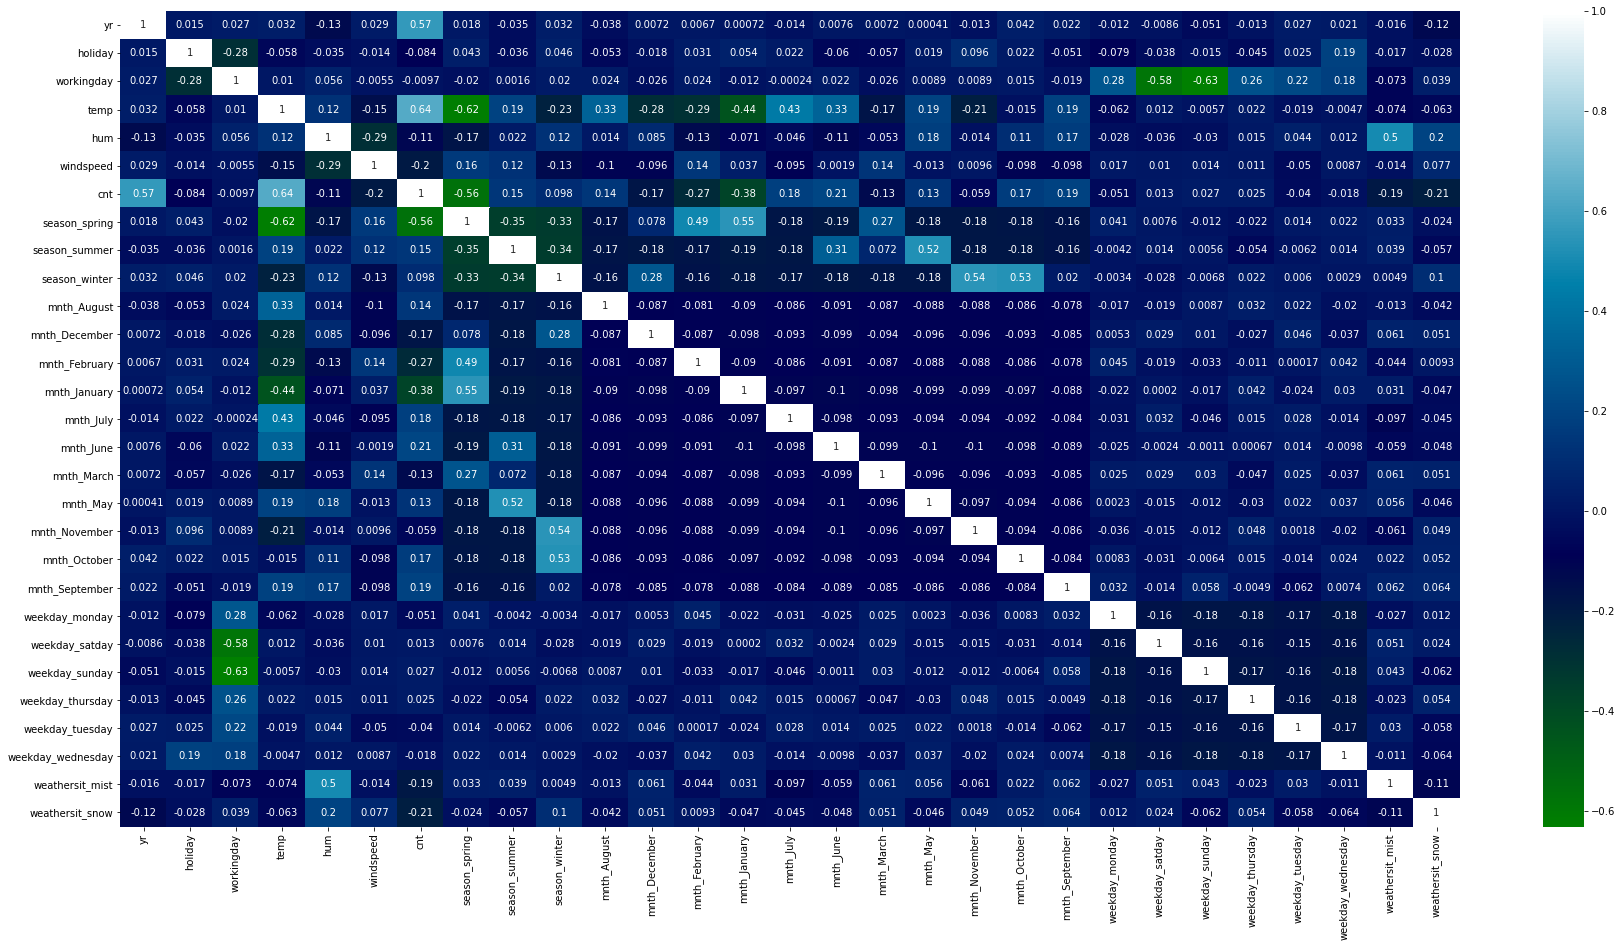

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="ocean")
plt.show()

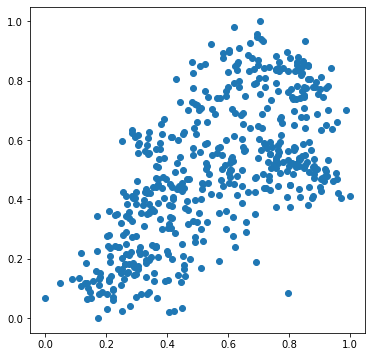

In [29]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### <span style='color:green'>  Dividing into X and Y sets for the model building

In [30]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train


In [31]:
y_train.head()

728    0.164795
56     0.185682
13     0.119522
120    0.352529
252    0.593263
Name: cnt, dtype: float64

In [32]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weekday_monday,weekday_satday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_mist,weathersit_snow
728,1,0,1,0.252441,0.498067,0.676936,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
56,0,0,1,0.286664,0.554315,0.338464,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,0,0,0,0.130569,0.554222,0.214724,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
120,0,0,1,0.503767,0.785315,0.173093,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
252,0,0,1,0.771134,0.776728,0.270509,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


### <span style='color:green'>Trainning the Data:

In [33]:
# Add a constant
X_train_lm = sm.add_constant(X_train[["temp"]])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [34]:
lr.params

const    0.135279
temp     0.637665
dtype: float64

In [35]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     344.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           4.38e-59
Time:                        16:53:47   Log-Likelihood:                 150.48
No. Observations:                 510   AIC:                            -297.0
Df Residuals:                     508   BIC:                            -288.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1353      0.021      6.542      0.0

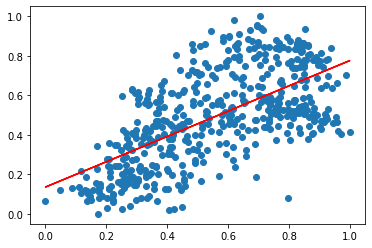

In [36]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.135798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [37]:
final.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_monday', 'weekday_satday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'weathersit_mist', 'weathersit_snow'],
      dtype='object')

In [38]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1= sm.OLS(y_train, X_train_lm).fit()

In [39]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     104.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          5.34e-185
Time:                        16:53:47   Log-Likelihood:                 518.33
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     481   BIC:                            -855.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3603      0.076      4.711      0.000       0.210       0.511
yr                    0.2423      0.008     29.251      0.000       0.226       0.259
holiday              -0.1164      0.054     -2.163      0.031      -0.222      -0.011
workingday           -0.0526      0.060     -0.882      0.378      -0.170       0.065
temp                  0.4787      0.045     10.723      0.000       0.391       0.566
hum                  -0.1942      0.039     -4.997      0.000      -0.271      -0.118
windspeed            -0.1844      0.028     -6.649      0.000      -0.239      -0.130
season_spring        -0.0588      0.030     -1.951      0.052      -0.118       0.000
season_summer         0.0387      0.025      1.537      0.125      -0.011       0.088
season_winter         0.1459      0.028      5.223      0.000       0.091       0.201
mnth_August          -0.0038      0.034     -0.113      0.910      -0.071       0.063
mnth_December        -0.0876      0.034     -2.562      0.011      -0.155      -0.020
mnth_February        -0.0360      0.034     -1.066      0.287      -0.102       0.030
mnth_January         -0.0577      0.034     -1.673      0.095      -0.125       0.010
mnth_July            -0.0273      0.034     -0.794      0.428      -0.095       0.040
mnth_June            -0.0040      0.024     -0.165      0.869      -0.051       0.043
mnth_March            0.0082      0.026      0.317      0.751      -0.043       0.059
mnth_May              0.0157      0.022      0.723      0.470      -0.027       0.058
mnth_November        -0.0957      0.037     -2.594      0.010      -0.168      -0.023
mnth_October         -0.0114      0.036     -0.315      0.753      -0.083       0.060
mnth_September        0.0600      0.032      1.872      0.062      -0.003       0.123
weekday_monday       -0.0085      0.015     -0.563      0.574      -0.038       0.021
weekday_satday       -0.0327      0.061     -0.539      0.590      -0.152       0.087
weekday_sunday       -0.0231      0.060     -0.383      0.702      -0.141       0.095
weekday_thursday      0.0208      0.015      1.378      0.169      -0.009       0.050
weekday_tuesday      -0.0201      0.016     -1.282      0.201      -0.051       0.011
weekday_wednesday    -0.0106      0.015     -0.700      0.484      -0.040       0.019
weathersit_mist      -0.0560      0.011     -5.239      0.000      -0.077      -0.035
weathersit_snow      -0.2014      0.031     -6.596      0.000      -0.261      -0.141
==============================================================================
Omnibus:                       81.145   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.139
Skew:                          -0.784   Prob(JB):                     4.28e-48
Kurtosis:      

# <span style='color:BROWN'> Building a linear model
###  <span style='color:green'> Using RFE to select variables

In [40]:
# importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Creating a RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18) # setting the limit of our feature variables to 18
rfe = rfe.fit(X_train, y_train) #fitting the object on our train dataset

In [42]:
# Result of Recursive elimination of variables and their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 11),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 10),
 ('mnth_March', False, 6),
 ('mnth_May', False, 2),
 ('mnth_November', True, 1),
 ('mnth_October', False, 7),
 ('mnth_September', True, 1),
 ('weekday_monday', False, 9),
 ('weekday_satday', False, 3),
 ('weekday_sunday', False, 4),
 ('weekday_thursday', True, 1),
 ('weekday_tuesday', False, 5),
 ('weekday_wednesday', False, 8),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [43]:
# Storing variables with significant weights in a variable

rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weekday_thursday', 'weathersit_mist',
       'weathersit_snow'],
      dtype='object')

In [44]:

rfe_vars1=X_train.columns[~rfe.support_]
rfe_vars1

Index(['mnth_August', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October',
       'weekday_monday', 'weekday_satday', 'weekday_sunday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

### <span style='color:green'> Building the model using RFE selected variables.

In [45]:
#Creating a train dataset using RFE variables

X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_February,mnth_January,mnth_July,mnth_November,mnth_September,weekday_thursday,weathersit_mist,weathersit_snow
728,1,0,1,0.252441,0.498067,0.676936,1,0,0,1,0,0,0,0,0,0,0,0
56,0,0,1,0.286664,0.554315,0.338464,1,0,0,0,1,0,0,0,0,0,0,0
13,0,0,0,0.130569,0.554222,0.214724,1,0,0,0,0,1,0,0,0,0,0,0
120,0,0,1,0.503767,0.785315,0.173093,0,1,0,0,0,0,0,0,0,0,1,0
252,0,0,1,0.771134,0.776728,0.270509,0,0,0,0,0,0,0,0,1,0,0,0


In [46]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_February,mnth_January,mnth_July,mnth_November,mnth_September,weekday_thursday,weathersit_mist,weathersit_snow
728,1.0,1,0,1,0.252441,0.498067,0.676936,1,0,0,1,0,0,0,0,0,0,0,0
56,1.0,0,0,1,0.286664,0.554315,0.338464,1,0,0,0,1,0,0,0,0,0,0,0
13,1.0,0,0,0,0.130569,0.554222,0.214724,1,0,0,0,0,1,0,0,0,0,0,0
120,1.0,0,0,1,0.503767,0.785315,0.173093,0,1,0,0,0,0,0,0,0,0,1,0
252,1.0,0,0,1,0.771134,0.776728,0.270509,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.52e-195
Time:                        16:53:47   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     491   BIC:                            -914.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3233      0.038  

## <span style='color:brown'> Manual Model Development using statsmodel

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
def calculateVIF(d):
    vif = pd.DataFrame()
    vif['Features'] = d.columns
    vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### <span style='color:green'> Model 1:

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)


,Features,VIF
0,const,91.75
7,season_spring,6.17
4,temp,4.32
9,season_winter,3.81
8,season_summer,2.94
12,mnth_January,2.40
11,mnth_February,2.00
5,hum,1.87
14,mnth_November,1.83
10,mnth_December,1.65


In [52]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.52e-195
Time:                        16:53:48   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     491   BIC:                            -914.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3233      0.038  

### <span style='color:green'> Model 2:

In [53]:
X_train_new = X_train_lm1.drop(["mnth_July"], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,90.47
7,season_spring,5.82
4,temp,4.23
9,season_winter,3.49
8,season_summer,2.41
12,mnth_January,2.40
11,mnth_February,2.00
5,hum,1.86
13,mnth_November,1.83
10,mnth_December,1.65


In [54]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.13e-195
Time:                        16:53:48   Log-Likelihood:                 515.63
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     492   BIC:                            -919.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3174      0.038  

### <span style='color:green'> Model 3:

In [55]:

X_train_new = X_train_lm1.drop(["mnth_February"], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,88.86
7,season_spring,5.16
4,temp,4.03
9,season_winter,3.48
8,season_summer,2.38
5,hum,1.86
12,mnth_November,1.78
11,mnth_January,1.64
15,weathersit_mist,1.56
10,mnth_December,1.46


In [56]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.53e-196
Time:                        16:53:48   Log-Likelihood:                 513.85
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     493   BIC:                            -921.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3081      0.038  

### <span style='color:green'> Model 4:

In [57]:

X_train_new = X_train_lm1.drop(["mnth_January"], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,85.58
7,season_spring,5.12
4,temp,3.70
9,season_winter,3.45
8,season_summer,2.33
5,hum,1.85
11,mnth_November,1.75
14,weathersit_mist,1.56
10,mnth_December,1.36
6,windspeed,1.22


In [58]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.66e-196
Time:                        16:53:51   Log-Likelihood:                 511.31
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     494   BIC:                            -922.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2921      0.037  

### <span style='color:green'> Model 5:

In [59]:

X_train_new = X_train_lm1.drop(['weekday_thursday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,85.56
7,season_spring,5.11
4,temp,3.70
9,season_winter,3.44
8,season_summer,2.32
5,hum,1.85
11,mnth_November,1.75
13,weathersit_mist,1.56
10,mnth_December,1.36
6,windspeed,1.22


In [60]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.10e-196
Time:                        16:53:52   Log-Likelihood:                 508.41
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     495   BIC:                            -923.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2935      0.037     

### <span style='color:green'> Model 6:

In [61]:
X_train_new = X_train_lm1.drop(['season_spring'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,51.64
8,season_winter,1.85
5,hum,1.84
10,mnth_November,1.67
12,weathersit_mist,1.56
9,mnth_December,1.34
4,temp,1.31
7,season_summer,1.23
6,windspeed,1.21
13,weathersit_snow,1.18


In [62]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.54e-195
Time:                        16:53:52   Log-Likelihood:                 503.72
No. Observations:                 510   AIC:                            -979.4
Df Residuals:                     496   BIC:                            -920.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2227      0.029     

### <span style='color:green'> Model 7:

In [63]:

X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,50.44
7,season_winter,1.85
4,hum,1.81
9,mnth_November,1.67
11,weathersit_mist,1.53
8,mnth_December,1.33
3,temp,1.31
6,season_summer,1.23
5,windspeed,1.21
12,weathersit_snow,1.18


In [64]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     231.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.97e-194
Time:                        16:53:53   Log-Likelihood:                 498.77
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     497   BIC:                            -916.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2088      0.029     

### <span style='color:green'> Model 8:

In [65]:

X_train_new = X_train_lm1.drop(['mnth_December'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,49.77
4,hum,1.81
7,season_winter,1.65
10,weathersit_mist,1.53
8,mnth_November,1.48
3,temp,1.23
6,season_summer,1.22
5,windspeed,1.21
11,weathersit_snow,1.18
9,mnth_September,1.12


In [66]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.54e-193
Time:                        16:53:57   Log-Likelihood:                 493.28
No. Observations:                 510   AIC:                            -962.6
Df Residuals:                     498   BIC:                            -911.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1978      0.029     

### <span style='color:green'> Model 9:

In [67]:

X_train_new = X_train_lm1.drop(['mnth_November'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,49.74
4,hum,1.81
9,weathersit_mist,1.53
3,temp,1.22
6,season_summer,1.22
7,season_winter,1.22
5,windspeed,1.20
10,weathersit_snow,1.18
8,mnth_September,1.12
1,yr,1.04


In [68]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     267.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.35e-193
Time:                        16:54:02   Log-Likelihood:                 490.46
No. Observations:                 510   AIC:                            -958.9
Df Residuals:                     499   BIC:                            -912.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1960      0.029     

## <span style='color:orange'>Observations
    
We now a adjusted R - Squared value of 84.3% which is better. The VIF's of the feature variables are also in check.
    
There seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.The model looks good to me,hence considering this is as the final model (unless the test data metrics are not significantly close to this number).

In [69]:
# Checking the parameters obtained
lr1.params

const              0.196031
yr                 0.239093
holiday           -0.090196
temp               0.612749
hum               -0.225533
windspeed         -0.186383
season_summer      0.094579
season_winter      0.158877
mnth_September     0.099637
weathersit_mist   -0.047041
weathersit_snow   -0.182709
dtype: float64

### <span style='color:green'> Final Model Interpretation

Hypothesis Testing

Hypothesis Testing States that

H0:B1=B2=...=Bn=0

H1: at least one Bi!=0

In [70]:
lr1.params

const              0.196031
yr                 0.239093
holiday           -0.090196
temp               0.612749
hum               -0.225533
windspeed         -0.186383
season_summer      0.094579
season_winter      0.158877
mnth_September     0.099637
weathersit_mist   -0.047041
weathersit_snow   -0.182709
dtype: float64


### <span style='color:orange'> Observation:
From the lr1 model summary, it is evident that all our coefficients are not equal to zero, which means we can REJECT the NULL HYPOTHESIS



### <span style='color:green'>F-Staitsics
F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.

F-Statistics : 267.7
Prob (F-statistic): 2.35e-193
###  <span style='color:orange'> Observation: 
The F-Statistics value of 267.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### <span style='color:green'>  Best fitted model equation
<span style='background :yellow' >count=0.196031 - (0.239093 x yr) -(0.090196 x holiday) + (0.612749 x temp) − (0.225533 x hum) -(0.186383 x windspeed) + (0.094579 x season_summer) + (0.158877 x season_winter) + (0.099637 x mnth_September) - (0.047041 x weathersit_mist) − (0.182709 x weathersit_snow)

## <span style='color:brown'> Residual Analysis of the train data

In [71]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_1 model.
y_train_pred = lr_1.predict(X_train_lm)

In [72]:
y_train_pred = lm.predict(X_train_rfe)

In [73]:
res=y_train-y_train_pred

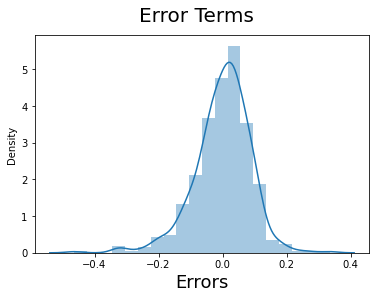

In [74]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

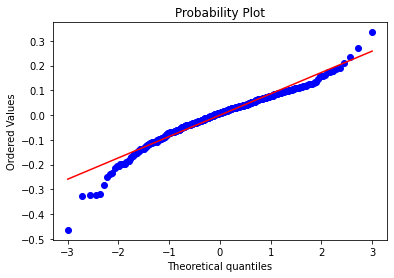

In [75]:
import pylab 
import scipy.stats as stats

res = (y_train - y_train_pred)
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

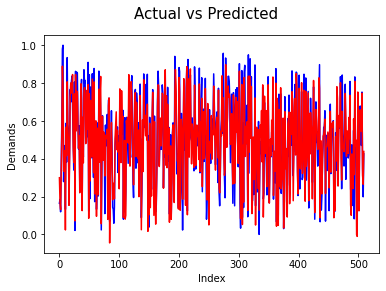

In [76]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### <span style='color:orange'> Observation:
Actual and Predicted result following almost the same pattern so this model seems ok

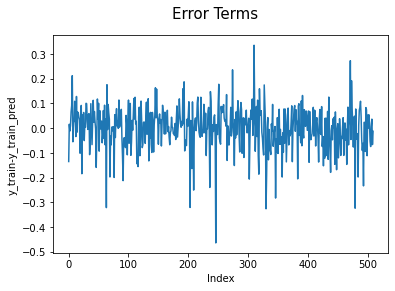

In [77]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### <span style='color:orange'>Observation:
Here,If we see the error terms are independent of each other.

## <span style='color:brown'> Making Predictions Using the Final Model

### <span style='color:green'> Applying the scaling on the test sets

In [78]:
# Apply scaler() to all the columns
# creating numaric vars

scaler_vars =['temp','hum','windspeed','cnt']

# FIt on data

df_test[scaler_vars] = scaler.transform(df_test[scaler_vars])

In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

In [81]:
y_pred = lr_1.predict(X_test_new)

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### <span style='color:green'> R-Squared value for test predictions

In [83]:
r_squared = r2_score(y_test, y_pred)
r_squared


0.8027497560817956

### <span style='color:orange'> observation:
R2 value for predictions on test data (0.802) is almost same as R2 value of train data(0.847). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

### <span style='color:green'>Homoscedacity

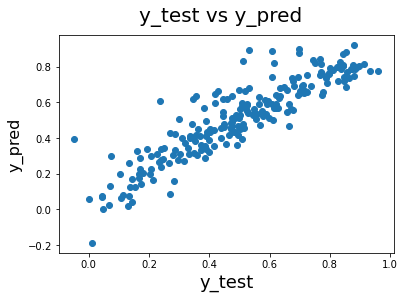

In [84]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [85]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)  

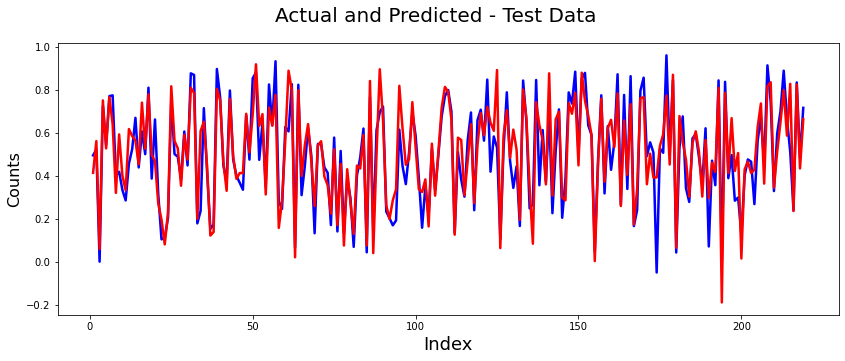

In [86]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')


### <span style='color:orange'> observation:
As we can see predictions for test data is very close to actuals

summer:
    
* We have a R-squared value of 84.7 % on train data and 80.27% on test data.
* Based on the model, the variables which are influencing the bike bookings are:


* Temperature (Temp)
It is evident from the model that customers prefer warm and pleasant temperature for bike booking

* Year
There was significant rise in bike booking in 2019 compared to 2018. It is expected that during post-Covid people will avail this service rather travelling in crowded buses and trains

* Season
It seems that customers prefered Summer and Fall season, hence, a good number of bikes should be available during this time.

* Weather
It seems that customers avoided renting bikes during light snow and rain and preferred clear and cloudy weather
Recommendations to increase sales

* Providing discounts and better deals
During rainy seasons, BoomBike should offer deals and discounts to attaract more customers.

* Rain Covers or Umbrellas
Attached umbrellas or rain protective gears with bikes may attract more customers during rainy season